In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from textblob import TextBlob
import emoji
from collections import Counter
import os
from wordcloud import WordCloud,STOPWORDS

import nltk
from nltk.stem import PorterStemmer

In [2]:
files = [file for file in os.listdir('turkey')]
for file in files:
    print(file)


depremGun1en.csv
depremGun1en_V2.csv
depremGun2en.csv
depremGun2en_V2.csv
depremGun3en.csv
depremGun3en_V2.csv
depremGun4en.csv
depremGun4en_V2.csv
depremGun5en.csv
depremGun5en_V2.csv


In [3]:
files = [file for file in os.listdir('turkey')]
comments = pd.DataFrame()# Creating an empty DataFrame
for file in files:
    data = pd.read_csv(os.path.join('turkey', file))
    comments = pd.concat([comments, data])
comments

,url,username,Date,Tweet,hashtag,mentions,likeCount,retweetCount,replyCount
0,https://twitter.com/MohdAhtishamAh1/status/162...,MohdAhtishamAh1,2023-02-06 23:59:16+00:00,That kid has been under the rubble since morni...,"['deprem', 'Turkey', 'İstanbul', 'kizilay', 'i...",none,76,50,2
1,https://twitter.com/rehabilite_1903/status/162...,rehabilite_1903,2023-02-06 23:58:40+00:00,Aminnn....,['deprem'],none,2,0,0
2,https://twitter.com/AhsanshahDfkz7/status/1622...,AhsanshahDfkz7,2023-02-06 23:58:20+00:00,O Allah save turkiye from further disasters &a...,"['Tsunami', 'earthquake', 'Syria', 'TurkeyEart...",none,1,0,0
3,https://twitter.com/eneskrkc/status/1622746440...,eneskrkc,2023-02-06 23:57:55+00:00,"My dear friends in the USA, if you want to hel...","['deprem', 'HelpTurkey']",none,1,0,0
4,https://twitter.com/Parytecom/status/162274626...,Parytecom,2023-02-06 23:57:14+00:00,Powerful 7.8 Earthquake in Turkey &amp; Syria ...,"['news', 'earthquake', 'türkiye', 'syria', 'tu...",none,286,113,8
...,...,...,...,...,...,...,...,...,...
1569,https://twitter.com/HispanatoliaEN/status/1623...,HispanatoliaEN,2023-02-10 00:01:38+00:00,Another in a born just 10 days ago and his ...,"['miracle', 'Turkey', 'baby', 'Hatay', 'Turkey...",none,34,7,0
1570,https://twitter.com/Jr3597/status/162383447072...,Jr3597,2023-02-10 00:01:21+00:00,FOOD &amp; SANITARY NAPKINS NEEDED IN,"['Turkiye', 'TurkeyEarthquake', 'HatayAntakya'...",none,0,1,0
1571,https://twitter.com/BCWildfireWkly/status/1623...,BCWildfireWkly,2023-02-10 00:00:25+00:00,Earthquake Donation Point via 👇Bazaar Istan...,"['NiagaraFalls', 'Ontario', 'Turkey', 'TurkeyE...","['', 'TurkFederation']",0,1,0
1572,https://twitter.com/Weinz_B/status/16238342217...,Weinz_B,2023-02-10 00:00:22+00:00,Did animals in Turkey and Syria sense the eart...,"['TurkeyEarthquake', 'syriaearthquake2023']",none,1,0,0


In [4]:
comments.to_csv('comments', index=False)

In [5]:
data = pd.read_csv('comments')

In [6]:
data['lowercase_tweet'] = data['Tweet'].str.lower()

In [7]:
print(data[['Tweet', 'lowercase_tweet']].head(1))

                                               Tweet  \
0  That kid has been under the rubble since morni...   

                                     lowercase_tweet  
0  that kid has been under the rubble since morni...  


In [8]:
data['tokenized_tweet'] = data['lowercase_tweet'].apply(lambda x: x.split())

In [9]:
stopwords = set(['the', 'is', 'and', 'to', 'in', 'of', 'for', 'a', 'an','if', 
                 "and",  "are", "earthquake","people", "with", "from", "you", "this", "on", "by"])
data['cleaned_tweet'] = data['tokenized_tweet'].apply(lambda x: [word for word in x if word not in stopwords])

In [10]:
print(data[['Tweet', 'lowercase_tweet', 'tokenized_tweet', 'cleaned_tweet']].head())

                                               Tweet  \
0  That kid has been under the rubble since morni...   
1                                         Aminnn....   
2  O Allah save turkiye from further disasters &a...   
3  My dear friends in the USA, if you want to hel...   
4  Powerful 7.8 Earthquake in Turkey &amp; Syria ...   

                                     lowercase_tweet  \
0  that kid has been under the rubble since morni...   
1                                         aminnn....   
2  o allah save turkiye from further disasters &a...   
3  my dear friends in the usa, if you want to hel...   
4  powerful 7.8 earthquake in turkey &amp; syria ...   

                                     tokenized_tweet  \
0  [that, kid, has, been, under, the, rubble, sin...   
1                                       [aminnn....]   
2  [o, allah, save, turkiye, from, further, disas...   
3  [my, dear, friends, in, the, usa,, if, you, wa...   
4  [powerful, 7.8, earthquake, in, turkey, &am

# stemming
    These techniques are used to reduce words to their base or root form, which helps to standardize variations of words and reduce the dimensionality of the data. running = run ,dreaming = dream

In [11]:
stemmer = PorterStemmer()
def stem_words(words):
    return [stemmer.stem(word) for word in words]
data['stemmed_tweet'] = data['cleaned_tweet'].apply(stem_words)

In [12]:
data

,url,username,Date,Tweet,hashtag,mentions,likeCount,retweetCount,replyCount,lowercase_tweet,tokenized_tweet,cleaned_tweet,stemmed_tweet
0,https://twitter.com/MohdAhtishamAh1/status/162...,MohdAhtishamAh1,2023-02-06 23:59:16+00:00,That kid has been under the rubble since morni...,"['deprem', 'Turkey', 'İstanbul', 'kizilay', 'i...",none,76,50,2,that kid has been under the rubble since morni...,"[that, kid, has, been, under, the, rubble, sin...","[that, kid, has, been, under, rubble, since, m...","[that, kid, ha, been, under, rubbl, sinc, morn..."
1,https://twitter.com/rehabilite_1903/status/162...,rehabilite_1903,2023-02-06 23:58:40+00:00,Aminnn....,['deprem'],none,2,0,0,aminnn....,[aminnn....],[aminnn....],[aminnn....]
2,https://twitter.com/AhsanshahDfkz7/status/1622...,AhsanshahDfkz7,2023-02-06 23:58:20+00:00,O Allah save turkiye from further disasters &a...,"['Tsunami', 'earthquake', 'Syria', 'TurkeyEart...",none,1,0,0,o allah save turkiye from further disasters &a...,"[o, allah, save, turkiye, from, further, disas...","[o, allah, save, turkiye, further, disasters, ...","[o, allah, save, turkiy, further, disast, &amp..."
3,https://twitter.com/eneskrkc/status/1622746440...,eneskrkc,2023-02-06 23:57:55+00:00,"My dear friends in the USA, if you want to hel...","['deprem', 'HelpTurkey']",none,1,0,0,"my dear friends in the usa, if you want to hel...","[my, dear, friends, in, the, usa,, if, you, wa...","[my, dear, friends, usa,, want, help, my, who,...","[my, dear, friend, usa,, want, help, my, who, ..."
4,https://twitter.com/Parytecom/status/162274626...,Parytecom,2023-02-06 23:57:14+00:00,Powerful 7.8 Earthquake in Turkey &amp; Syria ...,"['news', 'earthquake', 'türkiye', 'syria', 'tu...",none,286,113,8,powerful 7.8 earthquake in turkey &amp; syria ...,"[powerful, 7.8, earthquake, in, turkey, &amp;,...","[powerful, 7.8, turkey, &amp;, syria]","[power, 7.8, turkey, &amp;, syria]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45368,https://twitter.com/HispanatoliaEN/status/1623...,HispanatoliaEN,2023-02-10 00:01:38+00:00,Another in a born just 10 days ago and his ...,"['miracle', 'Turkey', 'baby', 'Hatay', 'Turkey...",none,34,7,0,another in a born just 10 days ago and his ...,"[another, in, a, born, just, 10, days, ago, an...","[another, born, just, 10, days, ago, his, moth...","[anoth, born, just, 10, day, ago, hi, mother, ..."
45369,https://twitter.com/Jr3597/status/162383447072...,Jr3597,2023-02-10 00:01:21+00:00,FOOD &amp; SANITARY NAPKINS NEEDED IN,"['Turkiye', 'TurkeyEarthquake', 'HatayAntakya'...",none,0,1,0,food &amp; sanitary napkins needed in,"[food, &amp;, sanitary, napkins, needed, in]","[food, &amp;, sanitary, napkins, needed]","[food, &amp;, sanitari, napkin, need]"
45370,https://twitter.com/BCWildfireWkly/status/1623...,BCWildfireWkly,2023-02-10 00:00:25+00:00,Earthquake Donation Point via 👇Bazaar Istan...,"['NiagaraFalls', 'Ontario', 'Turkey', 'TurkeyE...","['', 'TurkFederation']",0,1,0,earthquake donation point via 👇bazaar istan...,"[earthquake, donation, point, via, 👇bazaar, is...","[donation, point, via, 👇bazaar, istanbul, -, m...","[donat, point, via, 👇bazaar, istanbul, -, medi..."
45371,https://twitter.com/Weinz_B/status/16238342217...,Weinz_B,2023-02-10 00:00:22+00:00,Did animals in Turkey and Syria sense the eart...,"['TurkeyEarthquake', 'syriaearthquake2023']",none,1,0,0,did animals in turkey and syria sense the eart...,"[did, animals, in, turkey, and, syria, sense, ...","[did, animals, turkey, syria, sense, early?bir...","[did, anim, turkey, syria, sens, early?bird, f..."


In [13]:
data.drop(columns=['Tweet' , 'lowercase_tweet', 'tokenized_tweet', 'cleaned_tweet'], inplace=True)

In [14]:
def get_sentiment(text):
    blob = TextBlob(str(text))
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [15]:
data['sentiment'] =data['stemmed_tweet'].apply(get_sentiment)

In [16]:
sentiment_counts =data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Neutral     23858
Positive    13674
Negative     7841
Name: count, dtype: int64


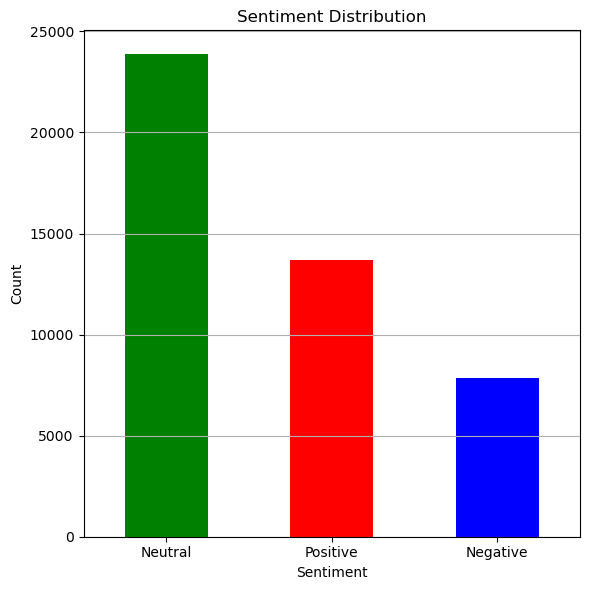

In [17]:
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.grid(True, axis='y')  # Add gridlines on the y-axis
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
data['sentiment'] = data['stemmed_tweet'].apply(get_sentiment)
positive_comments = data[data['sentiment'] == 'Positive']['stemmed_tweet']
positive_words = [word for comment in positive_comments for word in comment]

In [19]:
positive_words[0:10]

['o',
 'allah',
 'save',
 'turkiy',
 'further',
 'disast',
 '&amp;',
 'help',
 'those',
 'need😭🙏🏻🇵🇰🇹🇷nev']

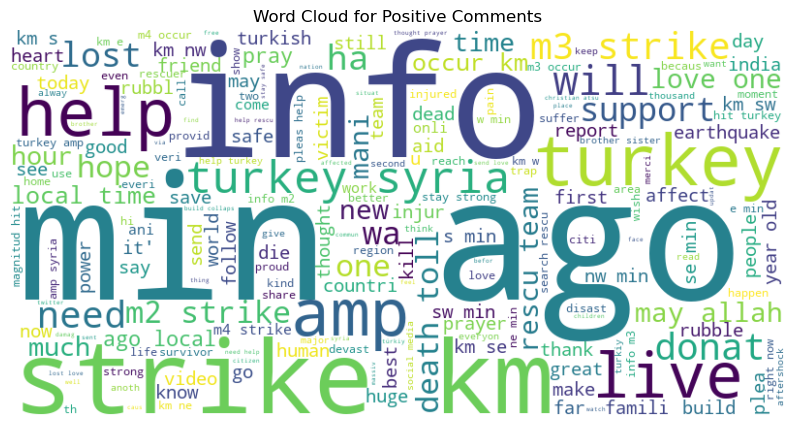

In [20]:
data['sentiment'] = data['stemmed_tweet'].apply(get_sentiment)
positive_comments = data[data['sentiment'] == 'Positive']['stemmed_tweet']
positive_words = [word for comment in positive_comments for word in comment]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Comments')
plt.axis('off')
plt.show()

In [21]:
data['sentiment'] = data['stemmed_tweet'].apply(get_sentiment)
neutral_comments = data[data['sentiment'] == 'Neutral']['stemmed_tweet']
neutral_words = [word for comment in neutral_comments for word in comment]

In [22]:
neutral_words[0:10]

['that', 'kid', 'ha', 'been', 'under', 'rubbl', 'sinc', 'morn', 'pleas', 'rt,']

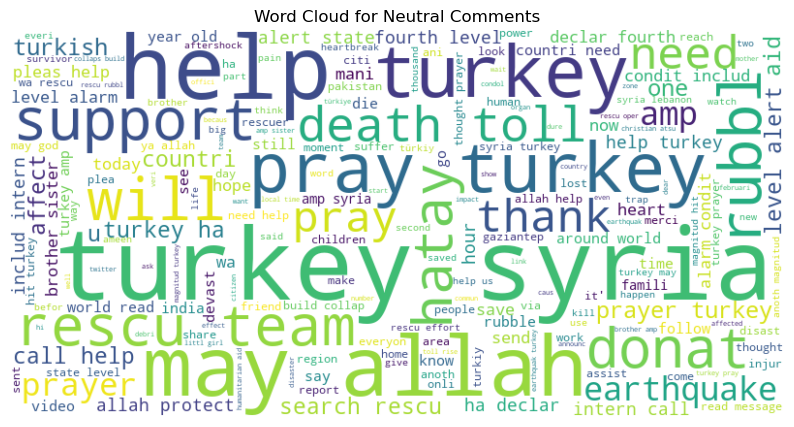

In [23]:
data['sentiment'] = data['stemmed_tweet'].apply(get_sentiment)
neutral_comments = data[data['sentiment'] == 'Neutral']['stemmed_tweet']
neutral_words = [word for comment in neutral_comments for word in comment]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Comments')
plt.axis('off')
plt.show()

In [24]:
data['sentiment'] = data['stemmed_tweet'].apply(get_sentiment)
negative_comments = data[data['sentiment'] == 'Negative']['stemmed_tweet']
negative_words = [word for comment in negative_comments for word in comment]

In [25]:
negative_words[0:10]

['my', 'dear', 'friend', 'usa,', 'want', 'help', 'my', 'who', 'affect', 'need']

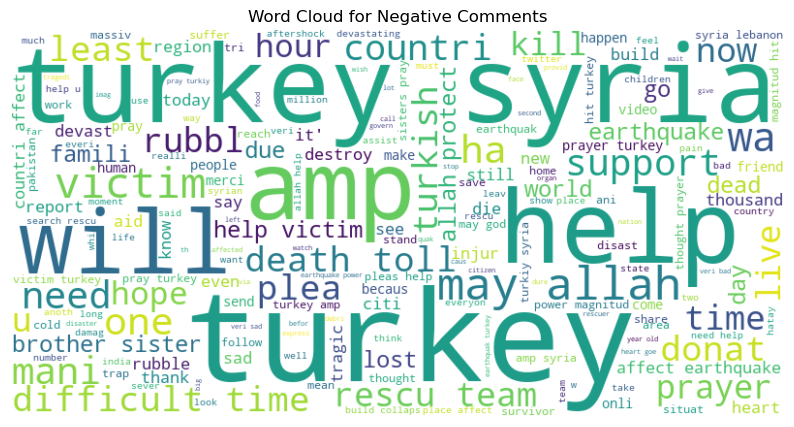

In [26]:
data['sentiment'] = data['stemmed_tweet'].apply(get_sentiment)
negative_comments = data[data['sentiment'] == 'Negative']['stemmed_tweet']
negative_words = [word for comment in negative_comments for word in comment]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Comments')
plt.axis('off')
plt.show()

In [27]:
all_emoji_list = []

for comment in data["stemmed_tweet"].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)

In [28]:
all_emoji_list[0:10]

['❤', '⚠️', '🇹🇷', '🖤', '🖤', '💔', '😭', '📌', '📌', '🙏']

In [29]:
Counter(all_emoji_list).most_common(10)

[('🇹🇷', 1670),
 ('🙏', 1159),
 ('💔', 769),
 ('🇸🇾', 389),
 ('🔔', 368),
 ('🤲', 327),
 ('🙏🏻', 251),
 ('❤️', 230),
 ('🚨', 216),
 ('😢', 164)]

# lets do some visualisation

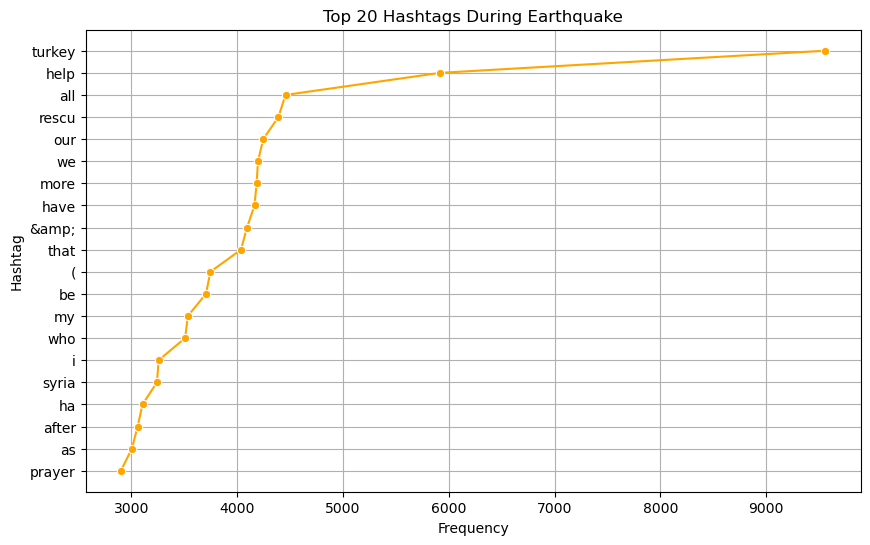

In [30]:
all_hashtags = []
for hashtags in data['stemmed_tweet']:
    all_hashtags.extend(hashtags)
hashtag_counts_lower = Counter(all_hashtags)
top_hashtags_lower = hashtag_counts_lower.most_common(20)
top_hashtags_lower_df = pd.DataFrame(top_hashtags_lower, columns=['Hashtag', 'Count'])
plt.figure(figsize=(10, 6))
sns.lineplot(x='Count', y='Hashtag', data=top_hashtags_lower_df, sort=False,color='Orange' ,  marker='o')
plt.title('Top 20 Hashtags During Earthquake')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.grid(True)  # Add gridlines
plt.show()

In [31]:
data['Date_sliced']=data['Date'].str[:10]

In [32]:
date= data.groupby('Date_sliced').size().reset_index(name='total_tweets')

In [33]:
date

,Date_sliced,total_tweets
0,2023-02-06,18844
1,2023-02-07,13138
2,2023-02-08,6834
3,2023-02-09,3815
4,2023-02-10,2742


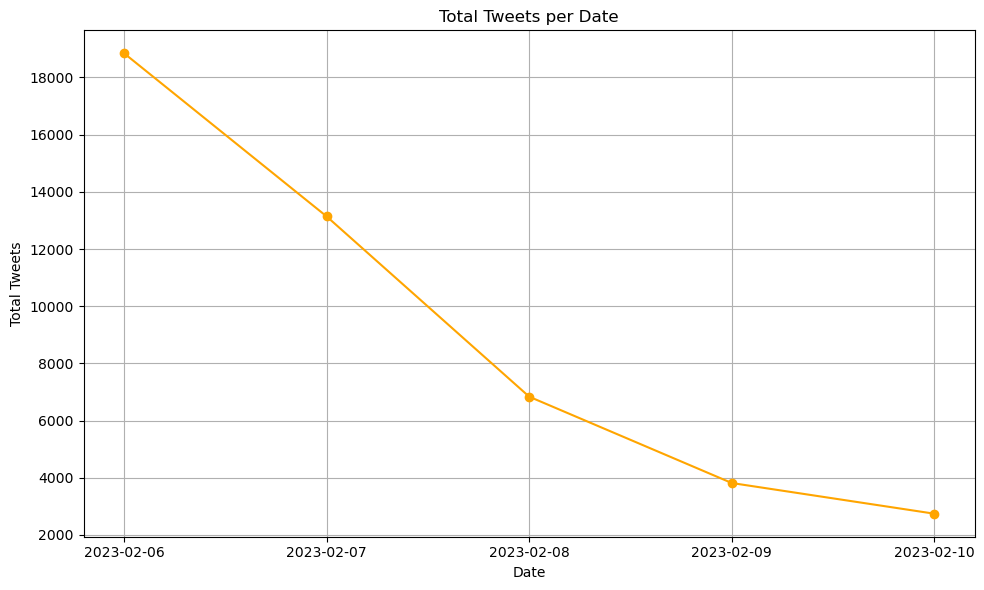

In [34]:
date = data.groupby('Date_sliced').size().reset_index(name='total_tweets')
plt.figure(figsize=(10, 6))
plt.plot(date['Date_sliced'],date['total_tweets'], marker='o', linestyle='-', color='orange')
plt.title('Total Tweets per Date')
plt.xlabel('Date')
plt.ylabel('Total Tweets')
plt.xticks(rotation=0) 
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
data['Date_sliced_hour']=data['Date'].str[:13]

In [36]:
date= data.groupby('Date_sliced_hour').size().reset_index(name='total_tweets')

In [37]:
date

,Date_sliced_hour,total_tweets
0,2023-02-06 01,50
1,2023-02-06 02,212
2,2023-02-06 03,540
3,2023-02-06 04,547
4,2023-02-06 05,443
...,...,...
114,2023-02-10 19,142
115,2023-02-10 20,124
116,2023-02-10 21,78
117,2023-02-10 22,67


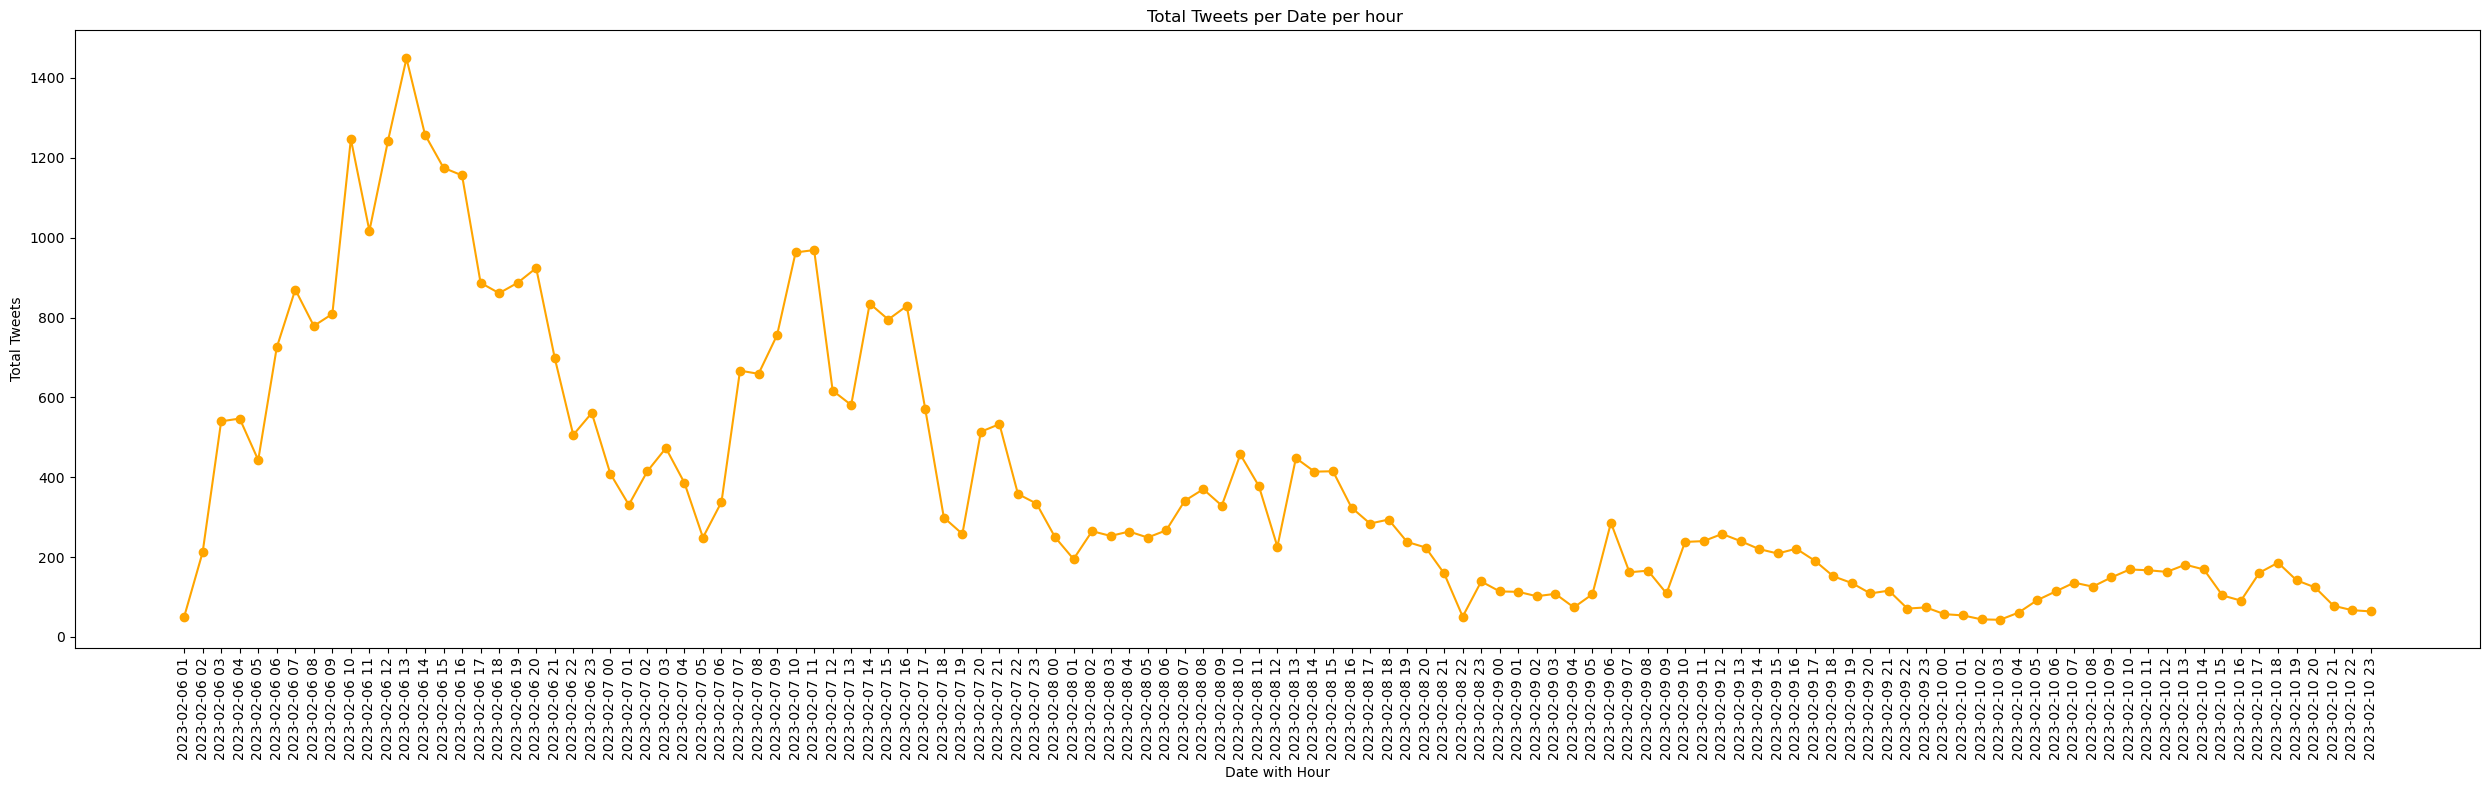

In [38]:
date = data.groupby('Date_sliced_hour').size().reset_index(name='total_tweets')
plt.figure(figsize=(25, 8))
plt.plot(date['Date_sliced_hour'],date['total_tweets'], marker='o', linestyle='-', color='orange')
plt.title('Total Tweets per Date per hour ')
plt.xlabel('Date with Hour')
plt.ylabel('Total Tweets')
plt.xticks(rotation=90) 
plt.grid(False)
plt.tight_layout()
plt.show()

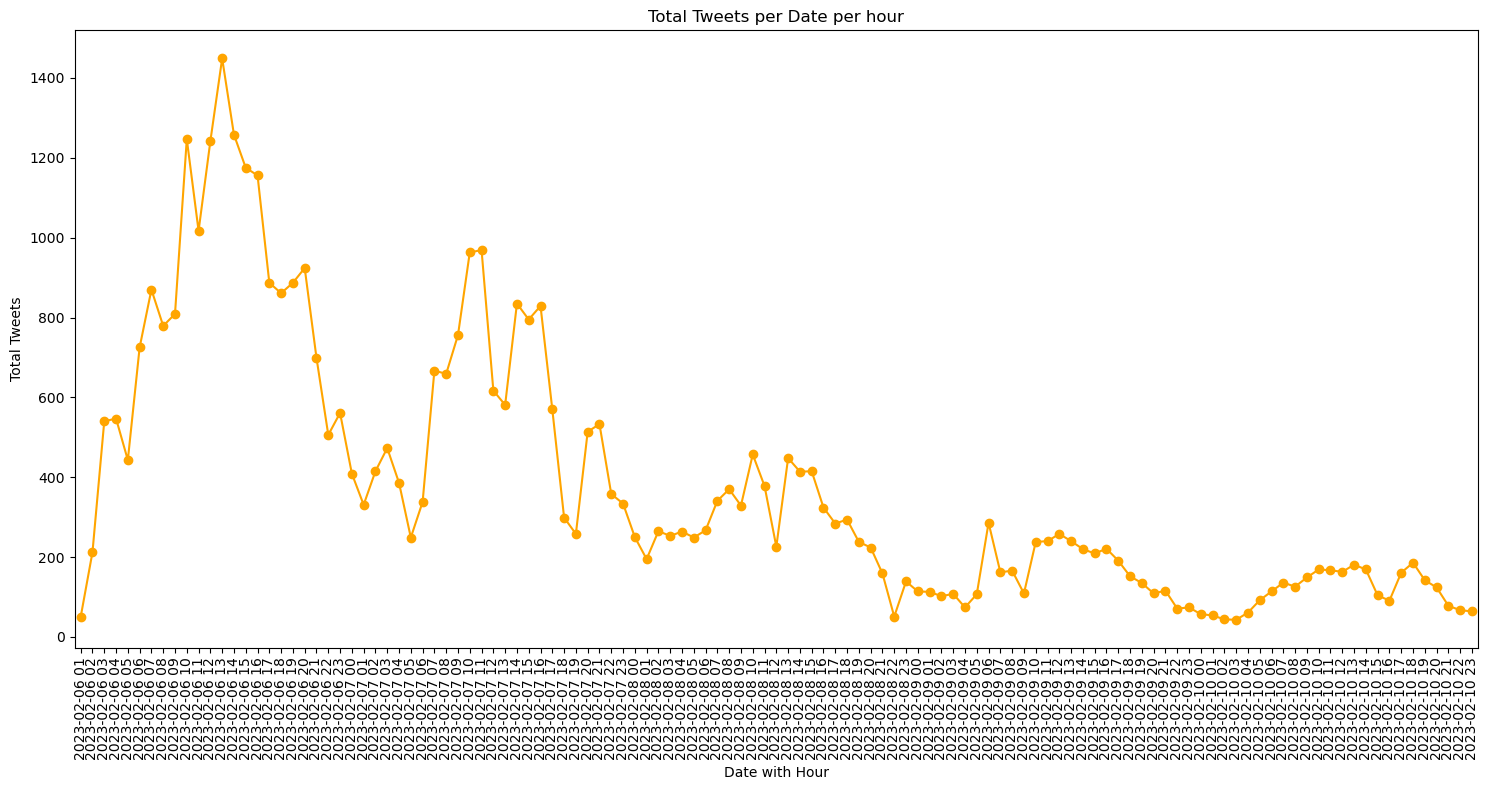

In [39]:
date = data.groupby('Date_sliced_hour').size().reset_index(name='total_tweets')
plt.figure(figsize=(15, 8))
plt.plot(date['Date_sliced_hour'], date['total_tweets'], marker='o', linestyle='-', color='orange')
plt.title('Total Tweets per Date per hour')
plt.xlabel('Date with Hour')
plt.ylabel('Total Tweets')
plt.xticks(rotation=90)
plt.grid(False)

# Adjusting the left and right limits of the x-axis to remove space before and after the x-axis label
date_numeric = range(len(date['Date_sliced_hour']))
plt.gca().set_xlim(left=min(date_numeric) - 0.5, right=max(date_numeric) + 0.5)

plt.tight_layout()
plt.show()
